This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [41]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [60]:
import pandas as pd 
import numpy as np
import datetime as dt
#ORBIT_CNT=hours,BX_COUNTER=mintues,TDC_MEAS=seconds

file_name = "./data/data_000637.txt"
data = pd.read_csv(file_name)
N=1000000

data = data.loc[:N ,:]
data


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
999996,1,0,51,3869209011,2561,12
999997,1,0,61,3869209011,2562,2
999998,1,0,50,3869209011,2563,4
999999,1,0,60,3869209011,2688,25


2\. Estimate the number of BX in a ORBIT (the value 'x').

In [61]:
column = data["BX_COUNTER"]
x = column.max()+1
print(x)

3564


3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

In [62]:
max_ = data["ORBIT_CNT"].max()
min_ = data["ORBIT_CNT"].min()

diff = max_ - min_
time = diff*x*25*(10**-9)
print("The acquisition lasted",time, "s")

The acquisition lasted 0.7880004 s


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

In [63]:
data['TIME_ns']=data['ORBIT_CNT']*x*25+data['BX_COUNTER']*25+data['TDC_MEAS']*25/30
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME_ns
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
999996,1,0,51,3869209011,2561,12,3.447465e+14
999997,1,0,61,3869209011,2562,2,3.447465e+14
999998,1,0,50,3869209011,2563,4,3.447465e+14
999999,1,0,60,3869209011,2688,25,3.447465e+14


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [64]:
data_grouped = data.groupby("TDC_CHANNEL").count()
data_grouped = data_grouped.sort_values(by="HEAD",ascending=False) 
print(data_grouped.index[0:3])

Int64Index([139, 64, 63], dtype='int64', name='TDC_CHANNEL')


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [65]:
print("number of unique orbits:",data["ORBIT_CNT"].unique().shape[0])
print("number of unique orbits with at least one measurement with TDC_CHANNEL=139:",data[data["TDC_CHANNEL"]==139]["ORBIT_CNT"].unique().shape[0])

number of unique orbits: 8841
number of unique orbits with at least one measurement with TDC_CHANNEL=139: 8816


7\. **Optional:** Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

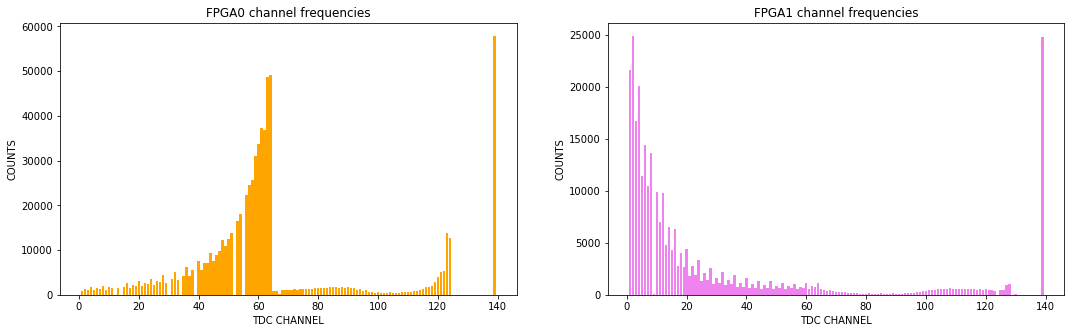

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,5))


#FPGA0 plot
FPGA0 = data[data['FPGA']==0].groupby('TDC_CHANNEL')[['TDC_MEAS']].count()
ax1.bar(FPGA0.index, FPGA0['TDC_MEAS'], color='orange') 
ax1.set_title('FPGA0 channel frequencies')
ax1.set_xlabel('TDC CHANNEL')
ax1.set_ylabel('COUNTS')

#FPGA1 plot
FPGA1 = data[data['FPGA']==1].groupby('TDC_CHANNEL')[['TDC_MEAS']].count()
ax2.bar(FPGA1.index, FPGA1['TDC_MEAS'], color='violet') 
ax2.set_title('FPGA1 channel frequencies')
ax2.set_xlabel('TDC CHANNEL')
ax2.set_ylabel('COUNTS');